## Generate recomendation statistics

In [28]:
from recomender.preprocessor import RatingDataset, MovieDataset
from recomender.evaluation import EvaluationGenerator

import pandas as pd
import json

### With MoviesLens dataset

In [ ]:
ratings_df = RatingDataset().preprocess_ratings(pd.read_csv('data/ml-latest-small/ratings.csv'))
movie_details_df = MovieDataset().join_movies_details(movies_df=pd.read_csv('data/ml-latest-small/movies.csv'), 
                                                      description_df=pd.read_csv("data/ml-latest-small/overviews.csv"))

print("quantity of unique users: "+str(len(set(ratings_df.userId.to_list()))))

combination_pre_process_techniques = [
    (1, (False, False, False)),
    (2, (False, False, True)),
    (3, (False, True, False)),
    (4, (False, True, True)),
    (5, (True, False, False)),
    (6, (True, False, True)),
    (7, (True, True, False)),
    (8, (True, True, True)),
]

evaluate_generator = EvaluationGenerator()

with open(f"{evaluate_generator.export_folder}/labels.json", "w", encoding="utf-8") as labels_file:
    labels_file.write(json.dumps({
    "recomendations_1": 'nenhuma técnica',
    "recomendations_2": 'stemm',
    "recomendations_3": 'lemma',
    "recomendations_4": 'stopword',
    "recomendations_5": 'stemm + lemma',
    "recomendations_6": 'stopword + stemm',
    "recomendations_7": 'stopword + lemma',
    "recomendations_8": 'todas as técnincas'
}))
for count, technique in combination_pre_process_techniques:
    evaluate_generator.generate(movie_details_df, ratings_df, technique, count)

#### Evaluate Recomendations

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import os
import json

In [46]:
def get_marker(i):
    markers = ['.',',','o','v','^','<','>','1','2','3','4','8','s','p','P','*','h','H','+','x','X','D','d','|','_']
    len_makers = len(markers)
    if i < len(markers):
        return markers[i]
    else:
        return markers[int(i / len_makers)-1]
    
def plot_results(results:dict, title:str, export_folder:str="result/first_run"):
    
    plt.title(title)
    plt.grid()
    
    x2 = np.arange(len(results[list(results.keys())[0]]["x_arr"]))
    
    for key in results.keys():
        plt.plot(x2, results[key]["y_arr"], label=results[key]["label"], marker=results[key]["marker"])
        plt.xticks(x2, results[key]["x_arr"])
        
    plt.legend(bbox_to_anchor=(1.04, 1))
    plt.ylabel('Valor')
    plt.xlabel('Tamanho da lista de recomendação')
    plt.savefig(f"{export_folder}/{title}.png", format="png")
    plt.show()
    plt.close()
    
def load_results(result_folder:str):
    
    x = [3, 5, 10]
    with open(f"{result_folder}/labels.json", "r") as labels_f:
        labels = json.loads(labels_f.read())
        
    recomendations_uri = glob.glob(result_folder+"/*.csv")
    results = {}
    for i in range(len(recomendations_uri)):
        recomendation_df = pd.read_csv(recomendations_uri[i])
        name = os.path.split(recomendations_uri[i])[1].replace(".csv", "")
        results[name] = ({
            "y_arr": [recomendation_df.prc_3.mean(), recomendation_df.prc_5.mean(), recomendation_df.prc_10.mean()],
            "x_arr": x,
            "label": labels[name],
            "marker": get_marker(i)
        })
        
    return results


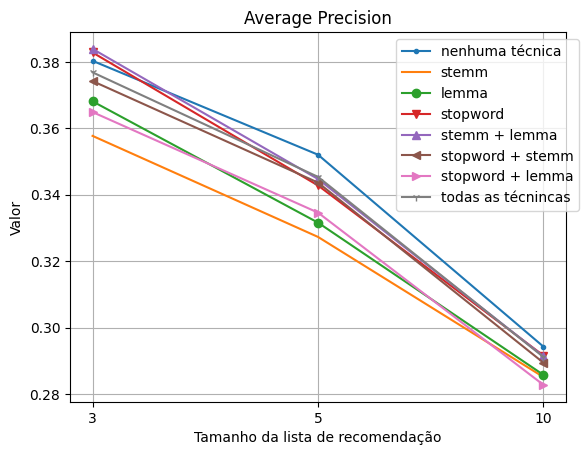

In [47]:
results = load_results("result/run9-2023-05-23")
plot_results(results = results, title="Average Precision", export_folder = "result/run9-2023-05-23")

In [39]:
results

[{'y_arr': [0.3802867383512545, 0.35204301075268823, 0.29430107526881727],
  'x_arr': [3, 5, 10],
  'label': 'nenhuma técnica',
  'marker': '.'},
 {'y_arr': [0.3577060931899641, 0.32731182795698927, 0.2851612903225806],
  'x_arr': [3, 5, 10],
  'label': 'stemm',
  'marker': ','},
 {'y_arr': [0.36810035842293903, 0.33161290322580644, 0.28580645161290325],
  'x_arr': [3, 5, 10],
  'label': 'lemma',
  'marker': 'o'},
 {'y_arr': [0.3827956989247312, 0.3427956989247312, 0.2916129032258065],
  'x_arr': [3, 5, 10],
  'label': 'stopword',
  'marker': 'v'},
 {'y_arr': [0.38387096774193546, 0.344731182795699, 0.2913978494623656],
  'x_arr': [3, 5, 10],
  'label': 'stemm + lemma',
  'marker': '^'},
 {'y_arr': [0.3741935483870968, 0.34365591397849465, 0.2894623655913978],
  'x_arr': [3, 5, 10],
  'label': 'stopword + stemm',
  'marker': '<'},
 {'y_arr': [0.3648745519713261, 0.3346236559139785, 0.28279569892473116],
  'x_arr': [3, 5, 10],
  'label': 'stopword + lemma',
  'marker': '>'},
 {'y_arr': 

In [34]:
((results["recomendations_4"].ap_5.mean() / recomendations_1.ap_5.mean()) - 1) * 100

NameError: name 'recomendations_4' is not defined

In [ ]:
min_aum_3 = (((recomendations_7.ap_3.mean() / recomendations_1.ap_3.mean()) - 1) * 100) 
max_aum_3 = (((recomendations_8.ap_3.mean() / recomendations_1.ap_3.mean()) - 1) * 100)
min_aum_5 = (((recomendations_4.ap_5.mean() / recomendations_1.ap_5.mean()) - 1) * 100)
max_aum_5 = (((recomendations_8.ap_5.mean() / recomendations_1.ap_5.mean()) - 1) * 100)
min_aum_10 = (((recomendations_3.ap_10.mean() / recomendations_1.ap_10.mean()) - 1) * 100)
max_aum_10 = (((recomendations_8.ap_10.mean() / recomendations_1.ap_10.mean()) - 1) * 100)

In [ ]:
print(f'Tamanho de lista 3: aumento de {min_aum_3:.2f}% a {max_aum_3:.2f}%')
print(f'Tamanho de lista 5: aumento de {min_aum_5:.2f}% a {max_aum_5:.2f}%')
print(f'Tamanho de lista 10: aumento de {min_aum_10:.2f}% a {max_aum_10:.2f}%')

Tamanho de lista 3: aumento de -1.14% a -1.68%
Tamanho de lista 5: aumento de -0.29% a -1.44%
Tamanho de lista 10: aumento de -4.15% a -1.59%


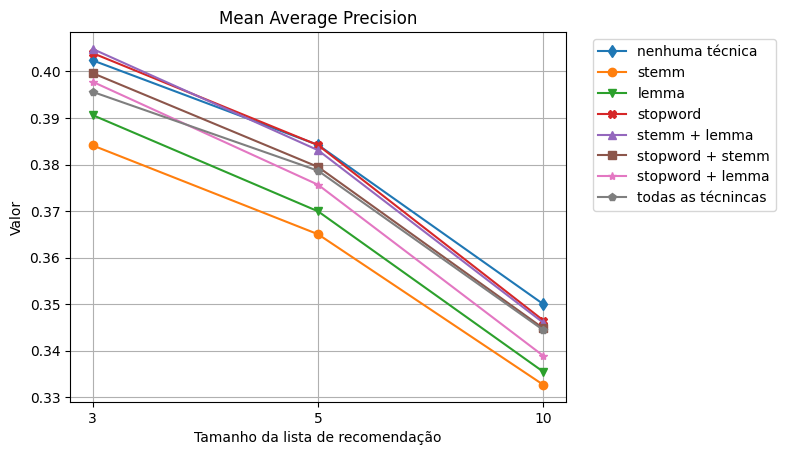

In [ ]:
plt.title('Mean Average Precision')
plt.grid()
plt.plot(x2, y_rec_1_ap, label=labels[1], marker='d')
plt.plot(x2, y_rec_2_ap, label=labels[2], marker='o')
plt.plot(x2, y_rec_3_ap, label=labels[3], marker='v')
plt.plot(x2, y_rec_5_ap, label=labels[5], marker='X')
plt.plot(x2, y_rec_4_ap, label=labels[4], marker='^')
plt.plot(x2, y_rec_6_ap, label=labels[6], marker='s')
plt.plot(x2, y_rec_7_ap, label=labels[7], marker='*')
plt.plot(x2, y_rec_8_ap, label=labels[8], marker='p')
plt.xticks(x2, x)
plt.legend(bbox_to_anchor=(1.04, 1))
plt.ylabel('Valor')
plt.xlabel('Tamanho da lista de recomendação')
plt.show()

In [ ]:
y_rec_1_rr = [recomendations_1.rr_3.mean(), recomendations_1.rr_5.mean(), recomendations_1.rr_10.mean()]
y_rec_2_rr = [recomendations_2.rr_3.mean(), recomendations_2.rr_5.mean(), recomendations_2.rr_10.mean()]
y_rec_3_rr = [recomendations_3.rr_3.mean(), recomendations_3.rr_5.mean(), recomendations_3.rr_10.mean()]
y_rec_4_rr = [recomendations_4.rr_3.mean(), recomendations_4.rr_5.mean(), recomendations_4.rr_10.mean()]
y_rec_5_rr = [recomendations_5.rr_3.mean(), recomendations_5.rr_5.mean(), recomendations_5.rr_10.mean()]
y_rec_6_rr = [recomendations_6.rr_3.mean(), recomendations_6.rr_5.mean(), recomendations_6.rr_10.mean()]
y_rec_7_rr = [recomendations_7.rr_3.mean(), recomendations_7.rr_5.mean(), recomendations_7.rr_10.mean()]
y_rec_8_rr = [recomendations_8.rr_3.mean(), recomendations_8.rr_5.mean(), recomendations_8.rr_10.mean()]

In [ ]:
print(recomendations_1.rr_3.mean())
print(recomendations_7.rr_3.mean())

0.5697132616487456
0.5695340501792114


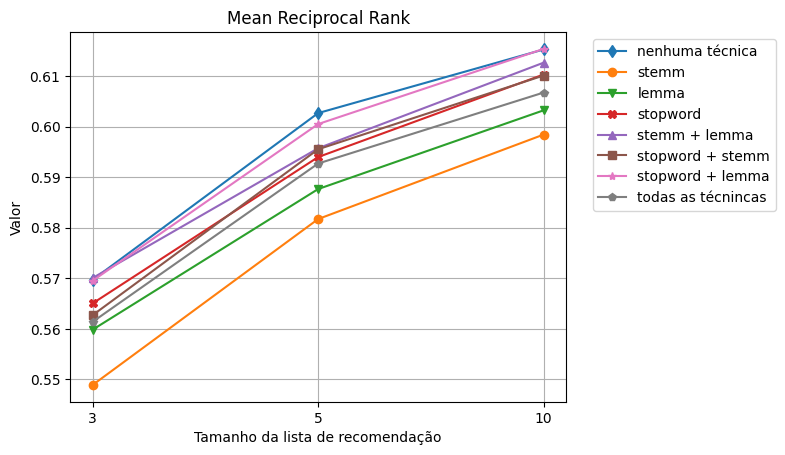

In [ ]:
plt.title('Mean Reciprocal Rank')
plt.grid()
plt.plot(x2, y_rec_1_rr, label=labels[1], marker='d')
plt.plot(x2, y_rec_2_rr, label=labels[2], marker='o')
plt.plot(x2, y_rec_3_rr, label=labels[3], marker='v')
plt.plot(x2, y_rec_5_rr, label=labels[5], marker='X')
plt.plot(x2, y_rec_4_rr, label=labels[4], marker='^')
plt.plot(x2, y_rec_6_rr, label=labels[6], marker='s')
plt.plot(x2, y_rec_7_rr, label=labels[7], marker='*')
plt.plot(x2, y_rec_8_rr, label=labels[8], marker='p')
plt.xticks(x2, x)
plt.legend(bbox_to_anchor=(1.04, 1))
plt.ylabel('Valor')
plt.xlabel('Tamanho da lista de recomendação')
plt.show()

In [ ]:
recomendations_1.rr_5.mean()

0.6026702508960574

In [ ]:
recomendations_3.rr_5.mean()

0.587652329749104

In [ ]:
min_aum_3 = (((recomendations_7.rr_3.mean() / recomendations_1.rr_3.mean()) - 1) * 100) 
max_aum_3 = (((recomendations_8.rr_3.mean() / recomendations_1.rr_3.mean()) - 1) * 100)
min_aum_5 = (((recomendations_7.rr_5.mean() / recomendations_1.rr_5.mean()) - 1) * 100)
max_aum_5 = (((recomendations_8.rr_5.mean() / recomendations_1.rr_5.mean()) - 1) * 100)
min_aum_10 = (((recomendations_7.rr_10.mean() / recomendations_1.rr_10.mean()) - 1) * 100)
max_aum_10 = (((recomendations_8.rr_10.mean() / recomendations_1.rr_10.mean()) - 1) * 100)

In [ ]:
print(f'Tamanho de lista 3: aumento de {min_aum_3:.2f}% a {max_aum_3:.2f}%')
print(f'Tamanho de lista 5: aumento de {min_aum_5:.2f}% a {max_aum_5:.2f}%')
print(f'Tamanho de lista 10: aumento de {min_aum_10:.2f}% a {max_aum_10:.2f}%')

Tamanho de lista 3: aumento de -0.03% a -1.46%
Tamanho de lista 5: aumento de -0.36% a -1.65%
Tamanho de lista 10: aumento de 0.02% a -1.38%
